In [1]:
#setwd("/home/ziverael/Dokumenty/Math/R/Time Serieses/Report2")
setwd("/Users/ewatrebacz/Documents/komputerowa_analiza_szeregow_czasowych/laboratorium/raport2")
library("pracma")
library("tidyverse")
library("e1071")
library("ggplot2")
library("ggExtra")
library("egg")
library("moments")
library("ggfortify")


plot.ts.my <- function(ys){
    df <- data.frame(x = 1:length(ys), y = ys);
    pl <- ggplot(
        data = df,
        aes(x = x, y = y)
    ) +
    geom_line() +
    theme_gray()
    return(pl)
}


est_beta0_beta1 <- function(xs, ys)
{
    mean_x <- mean(xs);
    est_beta1 <- sum((xs - mean_x) * ys) / sum((xs - mean_x) ** 2);
    est_beta0 <- mean(ys) - est_beta1 * mean_x;
    return(c(est_beta0, est_beta1));
}


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::cross()  masks pracma::cross()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Dołączanie pakietu: ‘e1071’


Następujący obiekt został zakryty z ‘package:pracma’:

    sigmoid


Ładowanie wymaganego pakietu: gridExtra


Dołączanie pakietu: ‘gridExtra’


Następujący obiekt został zakryty z ‘package:dplyr’:

    combine



Dołączanie pakietu: ‘moments’


Następujące obiekty zostały zakryte z ‘package:e1071’:

    kurtosis, moment, skewness




In [2]:
dataset <- read.csv("data.csv", header = TRUE, sep = ",")
dataset <- mutate(dataset, Date = as.Date(Date, format = "%Y-%m-%d"))
dataset <-  dataset %>% select(Date, TempAvgF)
head(dataset)
print(nrow(dataset))
df <- data.frame(y = as.numeric(dataset$TempAvgF))

,Date,TempAvgF
,<date>,<int>
1,2013-12-21,60
2,2013-12-22,48
3,2013-12-23,45
4,2013-12-24,46
5,2013-12-25,50
6,2013-12-26,48


[1] 1319


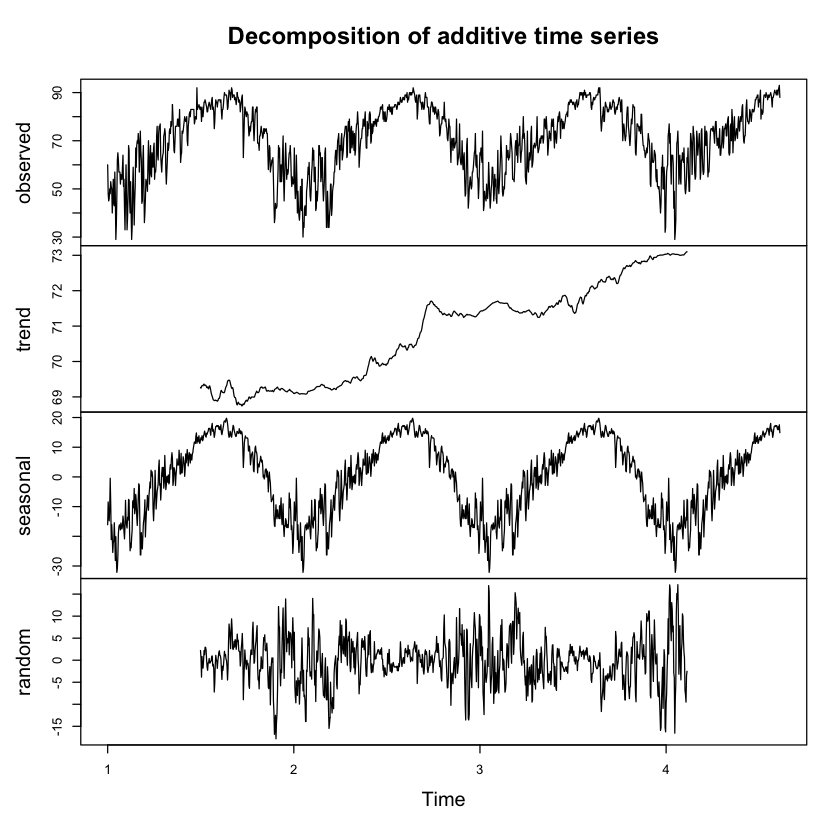

In [3]:
yt <- ts(df, frequency = 365)
yt_decomposed <- decompose(yt)
plot(yt_decomposed)

### Dane surowe

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Śr

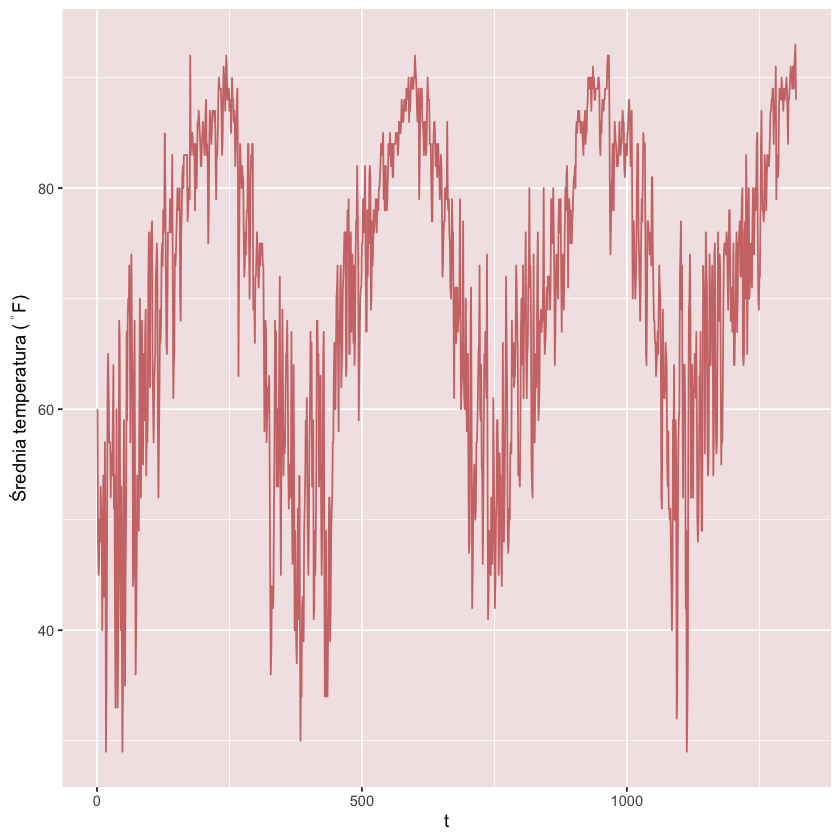

In [15]:
library(latex2exp)
#plot.ts.my(as.numeric(dataset$TempAvgF))
df2 <- data.frame(t = 1:length(as.numeric(dataset$TempAvgF)), data = as.numeric(dataset$TempAvgF))
ggplot(df2) +
  geom_line(aes(x = t, y = data), color='#CE7777')+
  labs(x = 't', y = TeX(r'(Średnia temperatura ($^\circ F$))')) +  
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

In [ ]:
library(tseries)
#?adf.test
adf.test(df2$data, alternative='stationary')


	Augmented Dickey-Fuller Test

data:  df2$data
Dickey-Fuller = -2.8498, Lag order = 10, p-value = 0.2186
alternative hypothesis: stationary


### ACF

In [162]:
p1 <- forecast::ggAcf(
  df2$data,
  lag.max = 20,
  type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#CE7777'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

In [163]:
p2 <- forecast::ggPacf(
  df2$data,
  lag.max = 20,
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#CE7777'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

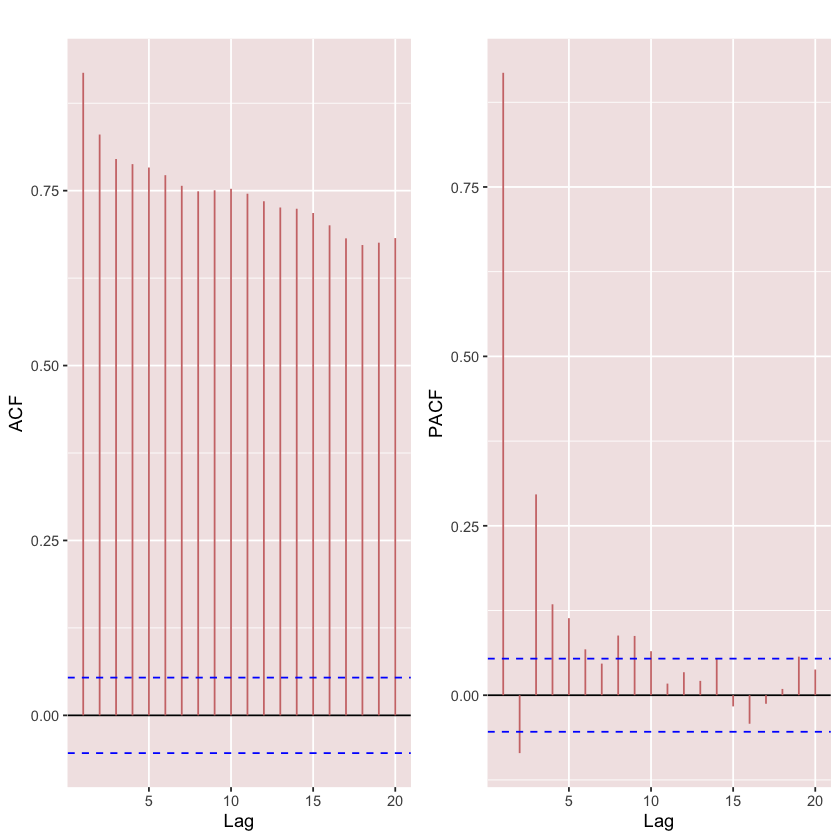

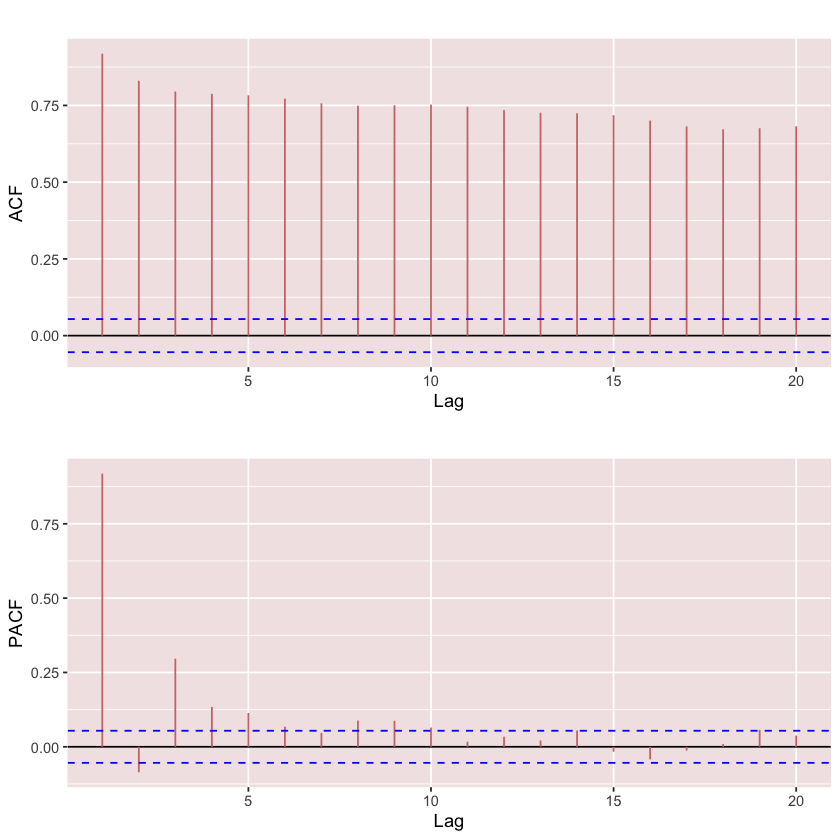

In [174]:
ggarrange(p1, p2, nrow = 1, ncol = 2)
ggarrange(p1, p2)

### Dane bez trendu

In [21]:
get_b0_b1 <- function(x, y){
  
  sum1 <- 0
  sum2 <- 0
  
  for(i in 1:length(x)){
    sum1 <- sum1 + x[i] * (y[i] - mean(y))
    sum2 <- sum2 + (x[i] - mean(x))^2
  }
  
  b1 <- sum1 / sum2
  b0 <- mean(y) - b1 * mean(x)
  
  return <- c(b0, b1)
}

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Śr

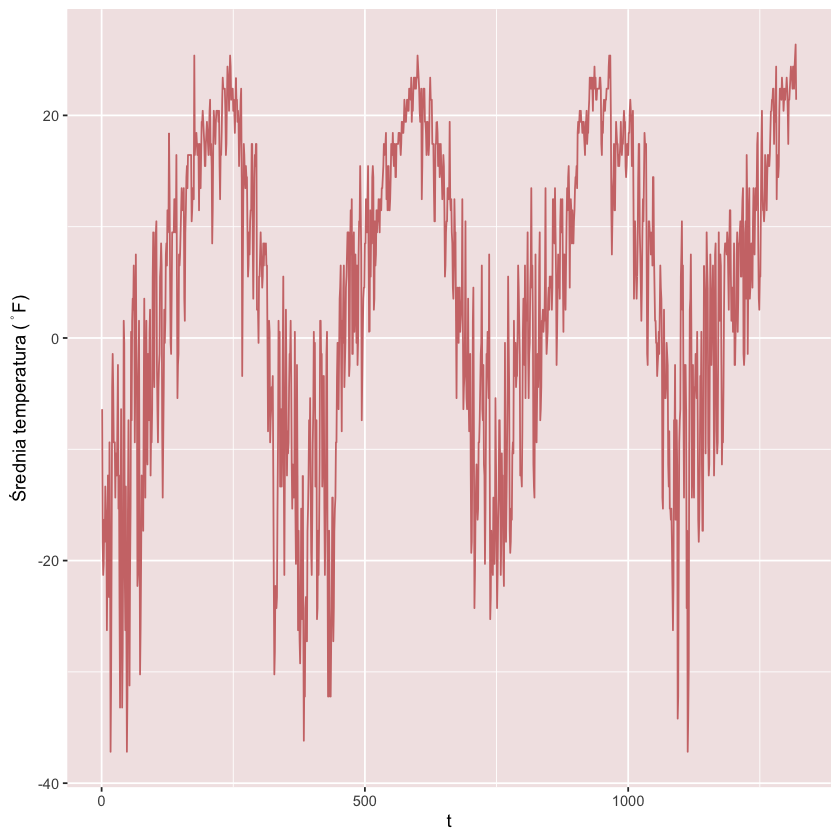

In [22]:
df2$bez_trendu <- df2$data - get_b0_b1(seq(1,1319), df2$data)[2] * df2$data - get_b0_b1(seq(1,1319), df2$data)[1]

ggplot(df2, aes(x = t, y = bez_trendu), color='#CE7777') +
  geom_line(color='#CE7777')+
  labs(x = 't', y = TeX(r'(Średnia temperatura ($^\circ F$))')) +  
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))


### Dane bez trendu i okresu

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Śr

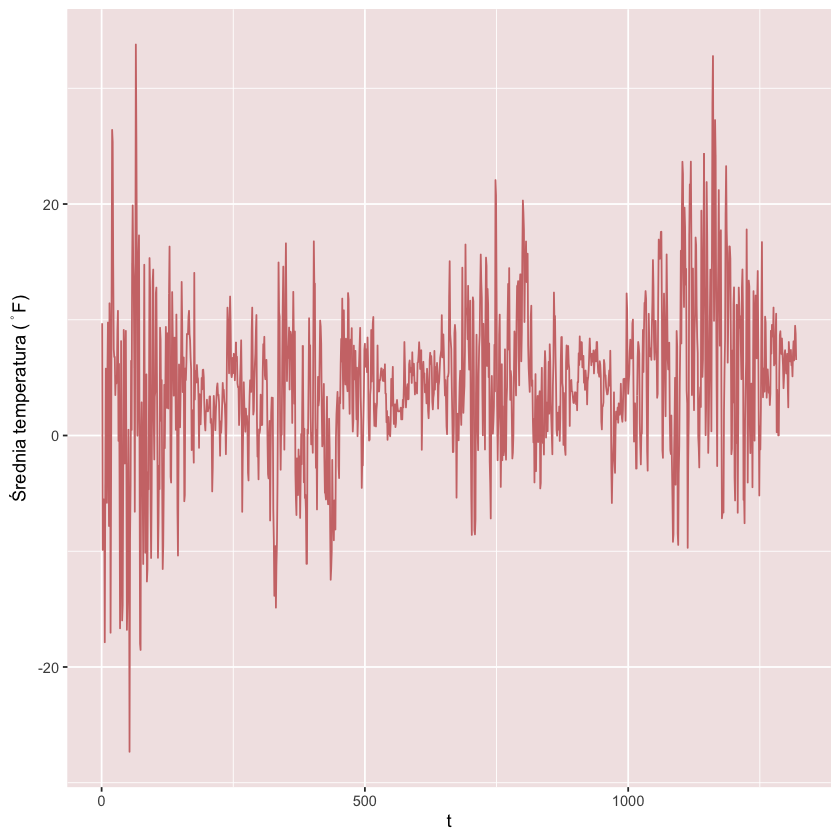

In [23]:
df2$bez_okresu <- df2$bez_trendu - as.numeric(yt_decomposed$seasonal)
ggplot(df2, aes(x = t, y = bez_okresu), color='#CE7777') +
  geom_line(color='#CE7777')+
  labs(x = 't', y = TeX(r'(Średnia temperatura ($^\circ F$))')) +  
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

### Dekompozycja

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu trendu' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu trendu' w 'mbcsToSbcs': kropka zastąpiona <99>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu trendu' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu trendu' w 'mbcsToSbcs': kropka zastąpiona <99>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu trendu' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Dane po usunięciu tren

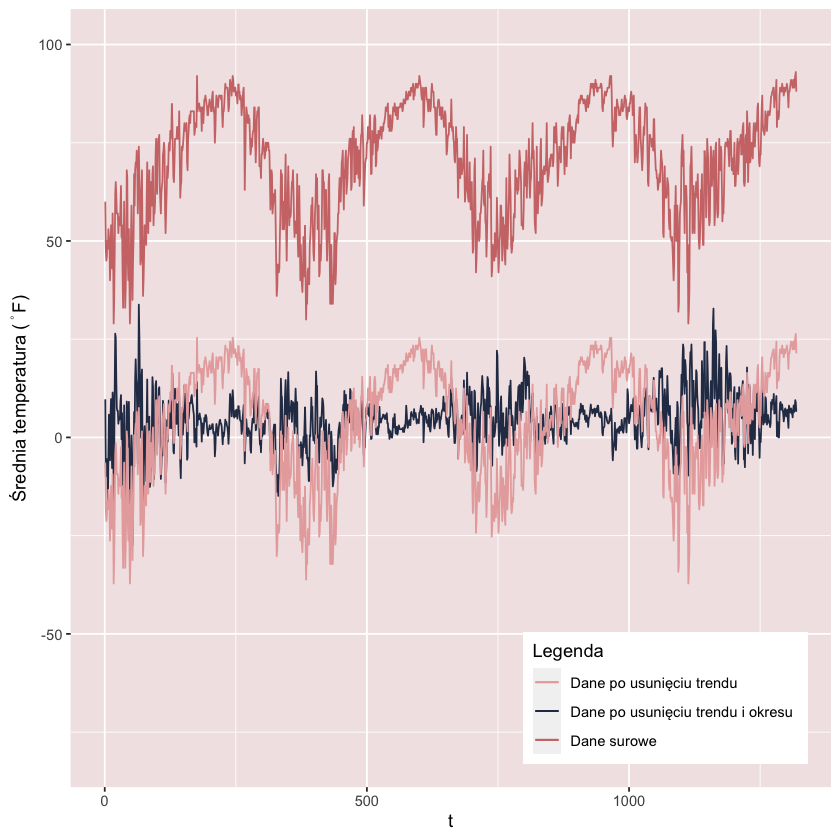

In [41]:
ggplot(df2) +
  geom_line(aes(x = t, y = bez_okresu, color='Dane po usunięciu trendu i okresu'))+
  ylim(c(-80,100)) +
  geom_line(aes(x = t, y = data, color = 'Dane surowe')) +
  geom_line(aes(x = t, y = bez_trendu, color = 'Dane po usunięciu trendu')) +
  labs(x = 't', y = TeX(r'(Średnia temperatura ($^\circ F$))')) +  
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"),
  legend.position = c(.97, .20),
  legend.justification = c("right", "top"),
  legend.box.just = "right",
  legend.margin = margin(6, 6, 6, 6)) +
  scale_color_manual('Legenda', values = c("#e7acac", "#2B3A55", "#CE7777"))

In [ ]:
adf.test(df2$bez_okresu, alternative='stationary')

Warning message in adf.test(df2$bez_okresu, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  df2$bez_okresu
Dickey-Fuller = -7.0213, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [175]:
p3 <- forecast::ggAcf(
  df2$bez_okresu,
  lag.max = 20,
  type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#2B3A55'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

In [178]:
p4 <- forecast::ggPacf(
  df2$bez_okresu,
  lag.max = 20,
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#2B3A55'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

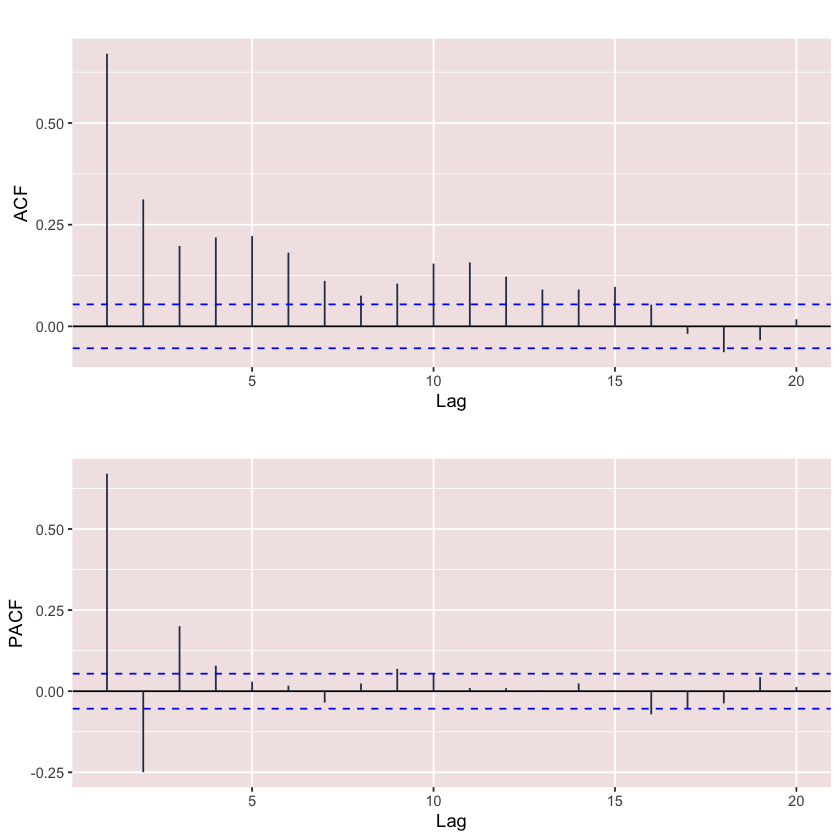

In [179]:
ggarrange(p3, p4)

### Dobranie rzędu modelu

In [54]:
ps <- seq(0, 10, 1)
qs <- seq(0, 10, 1)
matrix <- matrix(, nrow=length(ps)+1, ncol=length(qs)+1)
matrix[,1] <- c('p/q', ps)
matrix[1,] <- c('p/q', qs)
matrix
matrix[2,2]

row <- 2
col <- 2

for(i in ps){
    col <- 2
    for(j in qs){
        matrix[row, col] <- arima(df2$bez_okresu, order = c(i, 0, j))$aic
        col <- col + 1
    }
    row <- row + 1
}
matrix

p/q,0,1,2,3,4,5,6,7,8,9,10
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] NA

Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez_okresu, order = c(i, 0, j)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”
Warning message in arima(df2$bez

p/q,0,1,2,3,4,5,6,7,8,9,10
0,8667.28843882155,7921.71198044621,7774.1107275663,7769.52922342449,7768.23697821679,7763.05414363859,7751.79774957982,7746.24627542089,7747.26045329765,7747.84826670018,7749.84124064301
1,7881.91182263002,7765.36246970185,7765.89488558381,7739.10349965958,7740.115288087,7740.47929623283,7742.44781899047,7747.71237023886,7748.49855934379,7749.90537862233,7750.85179536187
2,7796.64720729537,7767.06234865238,7752.69092161802,7740.39833554453,7741.29963363511,7742.47810649696,7744.47242529634,7743.76014914482,7739.78754748986,7746.31890498542,7735.53236940095
3,7743.298889563,7736.26759145103,7738.2635708924,7739.69835570783,7741.67684916771,7745.1262063948,7731.31629602223,7731.52803778106,7733.057228216,7741.18871587985,7729.62607863763
4,7737.4733279574,7738.26353910312,7740.12476693014,7741.68673003734,7743.68236346917,7730.46348473731,7735.34747604842,7735.10260205883,7735.52977144671,7736.22962273382,7737.67655673904
5,7738.4059990364,7731.55684800652,7740.38721592009,7735.30627743255,7738.10268431541,7732.94535981378,7734.37833120588,7745.46255100151,7747.37783155075,7745.05667166316,7743.15380915814
6,7740.1374704931,7741.48570559261,7730.17716442167,7731.95813474767,7733.66983165876,7732.81680642769,7735.55196367148,7723.79347443607,7727.62600459565,7738.5280024763,7725.51840478316
7,7740.93536874162,7742.78410012285,7732.0573639261,7734.15341356404,7735.75666764202,7743.7483509934,7736.54499272022,7724.18635650629,7740.99224052022,7731.49501895494,7730.2228276711
8,7742.20617924109,7737.89354043257,7740.08442405014,7745.9966134567,7736.10185119498,7731.39071972837,7738.01742536074,7735.03775457714,7729.19700914717,7733.17285319892,7731.7823473304
9,7738.17967533595,7736.20923209923,7729.93137437921,7735.64333338948,7735.40497241648,7723.37630122636,7729.63250303632,7721.33276409409,7732.11152243711,7739.29415652295,7731.55804559006


In [56]:
print(which(matrix == min(matrix[2:12,2:12]), arr.ind = TRUE))
matrix[2:12,2:12]
min(matrix[2:11,2:11])

     row col
[1,]  11   9


8667.28843882155,7921.71198044621,7774.1107275663,7769.52922342449,7768.23697821679,7763.05414363859,7751.79774957982,7746.24627542089,7747.26045329765,7747.84826670018,7749.84124064301
7881.91182263002,7765.36246970185,7765.89488558381,7739.10349965958,7740.115288087,7740.47929623283,7742.44781899047,7747.71237023886,7748.49855934379,7749.90537862233,7750.85179536187
7796.64720729537,7767.06234865238,7752.69092161802,7740.39833554453,7741.29963363511,7742.47810649696,7744.47242529634,7743.76014914482,7739.78754748986,7746.31890498542,7735.53236940095
7743.298889563,7736.26759145103,7738.2635708924,7739.69835570783,7741.67684916771,7745.1262063948,7731.31629602223,7731.52803778106,7733.057228216,7741.18871587985,7729.62607863763
7737.4733279574,7738.26353910312,7740.12476693014,7741.68673003734,7743.68236346917,7730.46348473731,7735.34747604842,7735.10260205883,7735.52977144671,7736.22962273382,7737.67655673904
7738.4059990364,7731.55684800652,7740.38721592009,7735.30627743255,7738.10268431541,7732.94535981378,7734.37833120588,7745.46255100151,7747.37783155075,7745.05667166316,7743.15380915814
7740.1374704931,7741.48570559261,7730.17716442167,7731.95813474767,7733.66983165876,7732.81680642769,7735.55196367148,7723.79347443607,7727.62600459565,7738.5280024763,7725.51840478316
7740.93536874162,7742.78410012285,7732.0573639261,7734.15341356404,7735.75666764202,7743.7483509934,7736.54499272022,7724.18635650629,7740.99224052022,7731.49501895494,7730.2228276711
7742.20617924109,7737.89354043257,7740.08442405014,7745.9966134567,7736.10185119498,7731.39071972837,7738.01742536074,7735.03775457714,7729.19700914717,7733.17285319892,7731.7823473304
7738.17967533595,7736.20923209923,7729.93137437921,7735.64333338948,7735.40497241648,7723.37630122636,7729.63250303632,7721.33276409409,7732.11152243711,7739.29415652295,7731.55804559006
7735.89210713517,7737.6051649472,7739.53056748647,7741.52747123536,7734.92872628901,7727.82990423107,7729.33370415714,7737.42871535678,7727.66158440765,7725.89318909632,7728.00089826515


[1] "7721.33276409409"

### ARMA(7,7)

In [59]:
model <- arima(df2$bez_okresu, order = c(7, 0, 7))
coef <- model$coef
sigma2 <- model$sigma2
#res <- model$residuals

Warning message in arima(df2$bez_okresu, order = c(7, 0, 7)):
“prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1”


#### Przedziały ufności dla PACF/ACF

In [60]:
emp_acv <- function(x, h){
  result <- 1/length(x) * sum((x[1:(length(x) - h)] - mean(x)) * (x[(1 + h):length(x)] - mean(x)))
  return(result)
}

emp_acf <- function(x, h){
  return(emp_acv(x, h) / emp_acv(x, 0))
}

In [75]:
matrix2 <- matrix(, nrow=20, ncol=100)
#matrix2 <- matrix(, nrow=21, ncol=100)
h <- seq(1,20, 1)

for(i in 1:100){
  Xt <- arima.sim(n = 1319, list(ar = coef[1:7], ma = coef[8:14]),
          sd = sqrt(sigma2))
  pacf_t <- pacf(Xt, 20, plot = FALSE)$acf
  pacf_t <- pacf_t#c(1, pacf_t)
  for(j in 1:20){
    matrix2[j,i] <- pacf_t[j]
    #matrix2[j,i] <- emp_acf(Xt, j-1)
  }
}

line_acv_5 <- c()
line_acv_95 <- c()
line_acf_5 <- c()
line_acf_95 <- c()


#library(stats)

for(i in 1:20){
  line_acv_5[i] <- quantile(matrix2[i,], 0.05)
  line_acv_95[i] <- quantile(matrix2[i,], 0.95)
  #line_acf_5[i] <- quantile(matrix2[i,], 0.05)
  #line_acf_95[i] <- quantile(matrix2[i,], 0.95)
}
matrix2

0.6694516360,0.643533748,6.395399e-01,0.6759993702,0.658890288,0.680862815,0.683432094,0.649859133,0.6810490963,0.702114561,⋯,0.662683656,0.659973860,0.691608494,0.664745742,0.6494657282,0.681043087,0.677996705,0.6803607232,0.698867500,0.6860651621
-0.2927666490,-0.270825108,-2.722086e-01,-0.2554028356,-0.264487372,-0.273028604,-0.242595670,-0.286395263,-0.2151281794,-0.227327876,⋯,-0.248676423,-0.266228678,-0.227685660,-0.263227987,-0.3015263171,-0.196786215,-0.278109688,-0.2266515510,-0.270548248,-0.2612347353
0.2287426946,0.204174351,2.226747e-01,0.2248688156,0.185074541,0.243873972,0.159369613,0.222175569,0.2327016322,0.220613676,⋯,0.234618203,0.217537765,0.174663223,0.183495834,0.1957037226,0.180611863,0.213151826,0.2112819122,0.168617061,0.2576078706
0.0981663729,0.040870123,5.234729e-02,0.0136528594,0.108551919,0.087717335,0.045171589,0.111830090,0.0834927966,0.090658827,⋯,0.082075081,0.097050041,0.099649361,0.080857886,0.1039979542,0.096572027,0.047290525,0.0325845766,0.053720636,0.0705253893
0.0311734870,0.048184826,6.214648e-02,0.0360879352,-0.004261340,0.068642886,0.039632431,0.041072326,0.0182662180,0.068278245,⋯,0.083498672,0.067503742,0.074208161,0.017323107,0.0848838608,0.028103253,0.073471800,0.0309625242,0.045584368,0.0363162770
0.0070522697,0.074617871,2.195509e-02,0.0828803570,0.034272391,0.029670229,0.032041056,-0.003493454,0.0512592898,0.040550624,⋯,0.035319471,0.012572772,0.032655959,0.040441239,0.0158881120,0.061489956,0.047632194,0.0726630659,0.103251100,0.0761911478
-0.0123271591,-0.042486817,1.895822e-02,-0.0489327777,-0.041292064,-0.079399664,-0.017718032,-0.035083836,-0.0115073736,-0.040906892,⋯,-0.011577765,-0.039643798,-0.026467500,-0.042531147,0.0005820562,-0.014758408,0.000336419,-0.0365293673,-0.014158245,-0.0298779128
0.0214562886,0.044577439,8.689732e-03,0.0047289210,0.045033689,0.059498821,-0.006430129,0.010817921,0.0208800571,0.047560011,⋯,0.002536205,0.018624223,0.003068256,0.078221610,0.0183511971,0.050254519,0.003193656,0.0390967494,0.035234783,0.0128963613
0.0877213817,0.022470997,2.774145e-02,-0.0031945508,0.071792053,0.083206059,0.013299318,0.061497797,0.0226451106,0.022814461,⋯,0.015387167,0.078646396,-0.014736628,0.035107458,-0.0315354763,0.014178624,0.026625087,0.0237070310,0.066868966,0.0295963419
0.0891024698,0.032299628,4.902842e-02,0.0215691554,0.005815134,0.004526238,0.006066572,-0.022774263,0.0265192933,0.057505179,⋯,0.037718949,0.007669117,0.051161837,0.004031360,0.0393081062,0.012115710,-0.022342738,-0.0029581336,-0.037345020,0.0257926899
-0.0006524095,0.049915136,-2.703915e-02,0.0112113715,0.009587615,0.004493797,0.001399875,0.010097033,0.0012777357,-0.003098763,⋯,-0.010655981,-0.011089641,0.059384059,0.020583906,0.0068768590,0.017496642,0.038563618,0.0056176727,-0.015116307,0.0224499771


In [180]:
df3 <- data.frame(h = h, pacf5 = line_acv_5, pacf95 = line_acv_95)
library('forecast')
p5 <- ggPacf(
  df2$bez_okresu,
  lag.max = 20,
  #type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#2B3A55'
) +
  labs(title = ' ') +
  geom_line(aes(x = df3$h, y = df3$pacf5, color='Przedział ufności'), linetype = 'dashed') +
  geom_line(aes(x = df3$h, y = df3$pacf95, color='Przedział ufności'), linetype = 'dashed') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"),
  legend.position = c(.95, .88),
  legend.justification = c("right", "top"),
  legend.box.just = "right",
  legend.margin = margin(6, 6, 6, 6)) +
  scale_color_manual('Legenda', values = c("#CE7777"))

In [83]:
matrix3 <- matrix(, nrow=20, ncol=100)
for(i in 1:100){
  Xt <- arima.sim(n = 1319, list(ar = coef[1:7], ma = coef[8:14]),
          sd = sqrt(sigma2))
  acf_t <- acf(Xt, 20, plot = FALSE)$acf[2:21]
  #pacf_t <- c(1, pacf_t)
  for(j in 1:20){
    #matrix2[j,i] <- pacf_t[j]
    #matrix3[j,i] <- emp_acf(Xt, j)
    matrix3[j,i] <- acf_t[j]

  }
}

line_acf_5 <- c()
line_acf_95 <- c()

for(i in 1:20){
  #line_acv_5[i] <- quantile(matrix2[i,], 0.05)
  #line_acv_95[i] <- quantile(matrix2[i,], 0.95)
  line_acf_5[i] <- quantile(matrix3[i,], 0.05)
  line_acf_95[i] <- quantile(matrix3[i,], 0.95)
}

In [181]:
df3$acf5 <- line_acf_5
df3$acf95 <- line_acf_95

 p6 <- ggAcf(
  df2$bez_okresu,
  lag.max = 20,
  type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#2B3A55'
) +
  geom_line(aes(x = df3$h, y = df3$acf5, color='Przedział ufności'), linetype = 'dashed') +
  geom_line(aes(x = df3$h, y = df3$acf95, color='Przedział ufności'), linetype = 'dashed') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"),
  legend.position = c(.95, .82),
  legend.justification = c("right", "top"),
  legend.box.just = "right",
  legend.margin = margin(6, 6, 6, 6)) +
  scale_color_manual('Legenda', values = c("#CE7777")) +
  labs(title = ' ') 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <9b>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Przedział ufności' w 'mbcsToSbcs': kropka zastąpiona <82>

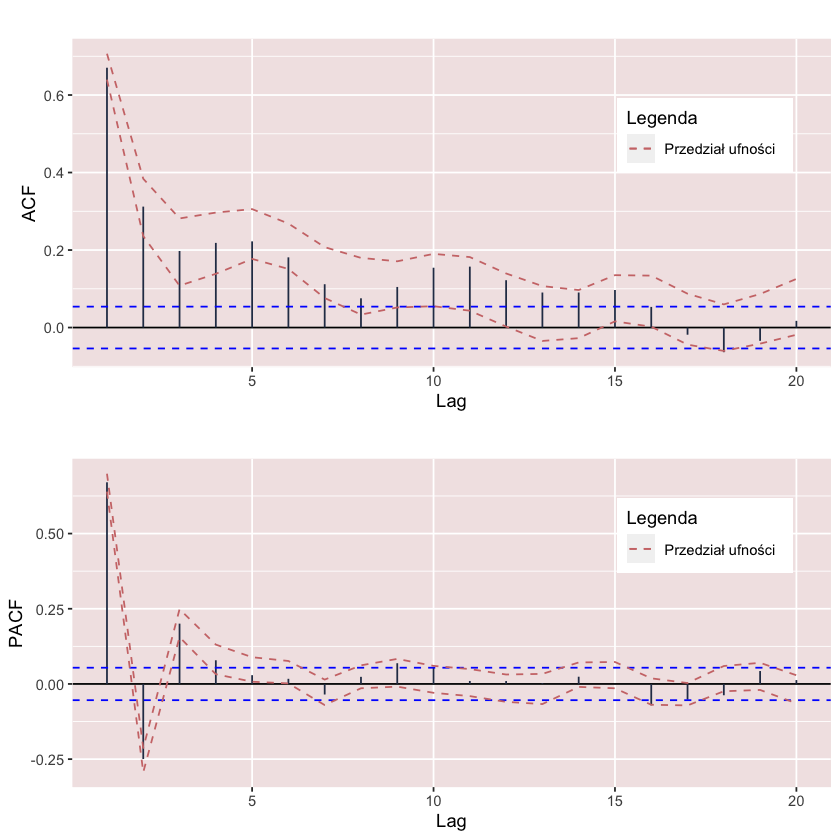

In [182]:
ggarrange(p6, p5)

### Porównanie linii kwantylowych z trajektorią

In [183]:
matrix4 <- matrix(, nrow = 100, ncol = 1319)
q10 <- c()
q90 <- c()
q5 <- c()
q95 <- c()
q40 <- c()
q60 <- c()
q75 <- c()
q25 <- c()

for (i in 1:100) {
    matrix4[i,] <- arima.sim(n = 1319, list(ar = coef[1:7], ma = coef[8:14]),
          sd = sqrt(sigma2))   
}
for (i in 1:1319) {
    q10[i] <- quantile(matrix4[,i], 0.1)
    q90[i] <- quantile(matrix4[,i], 0.9)
    q5[i] <- quantile(matrix4[,i], 0.05)
    q95[i] <- quantile(matrix4[,i], 0.95)
    q40[i] <- quantile(matrix4[,i], 0.4)
    q60[i] <- quantile(matrix4[,i], 0.6)
    q25[i] <- quantile(matrix4[,i], 0.25)
    q75[i] <- quantile(matrix4[,i], 0.75)
}

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Średnia temperatura (' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+25e6'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“nieznane metryki czcionki dla znaku Unicode 'U+015a'”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Śr

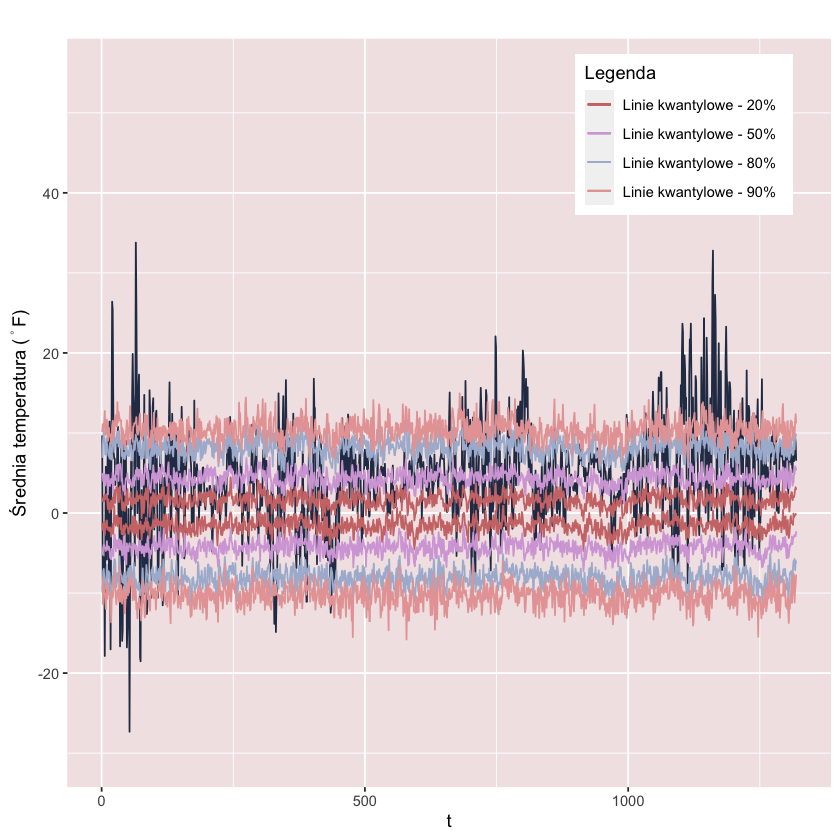

In [186]:
df2$q10 <- q10
df2$q90 <- q90
df2$q5 <- q5
df2$q95 <- q95
df2$q40 <- q40
df2$q60 <- q60
df2$q25 <- q25
df2$q75 <- q75

ggplot(df2, aes(x = t, y = bez_okresu), color='#2B3A55') +
  geom_line(color='#2B3A55')+
  ylim(c(-30,55)) +
  #xlim(c(0, 2000)) +
  geom_line(aes(x = t, y = q10, color = 'Linie kwantylowe - 80%')) +
  geom_line(aes(x = t, y = q90, color = 'Linie kwantylowe - 80%')) +
  geom_line(aes(x = t, y = q5, color = 'Linie kwantylowe - 90%')) +
  geom_line(aes(x = t, y = q95, color = 'Linie kwantylowe - 90%')) +
  geom_line(aes(x = t, y = q40, color = 'Linie kwantylowe - 20%')) +
  geom_line(aes(x = t, y = q60, color = 'Linie kwantylowe - 20%')) +
  geom_line(aes(x = t, y = q25, color = 'Linie kwantylowe - 50%')) +
  geom_line(aes(x = t, y = q75, color = 'Linie kwantylowe - 50%')) +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"),
  legend.position = c(.95, .98),
  legend.justification = c("right", "top"),
  legend.box.just = "right",
  legend.margin = margin(6, 6, 6, 6)) +
  scale_color_manual('Legenda', values = c("#CE7777", '#d5a7da', '#abb9d4', '#e7a4a4')) +
  labs(title = ' ', x = 't', y = TeX(r'(Średnia temperatura ($^\circ F$))')) 
  

### Założenie dot. normalności rozkładu

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Wartość resztowa modelu' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Wartość resztowa modelu' w 'mbcsToSbcs': kropka zastąpiona <9b>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Wartość resztowa modelu' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Wartość resztowa modelu' w 'mbcsToSbcs': kropka zastąpiona <87>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Wartość resztowa modelu' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds

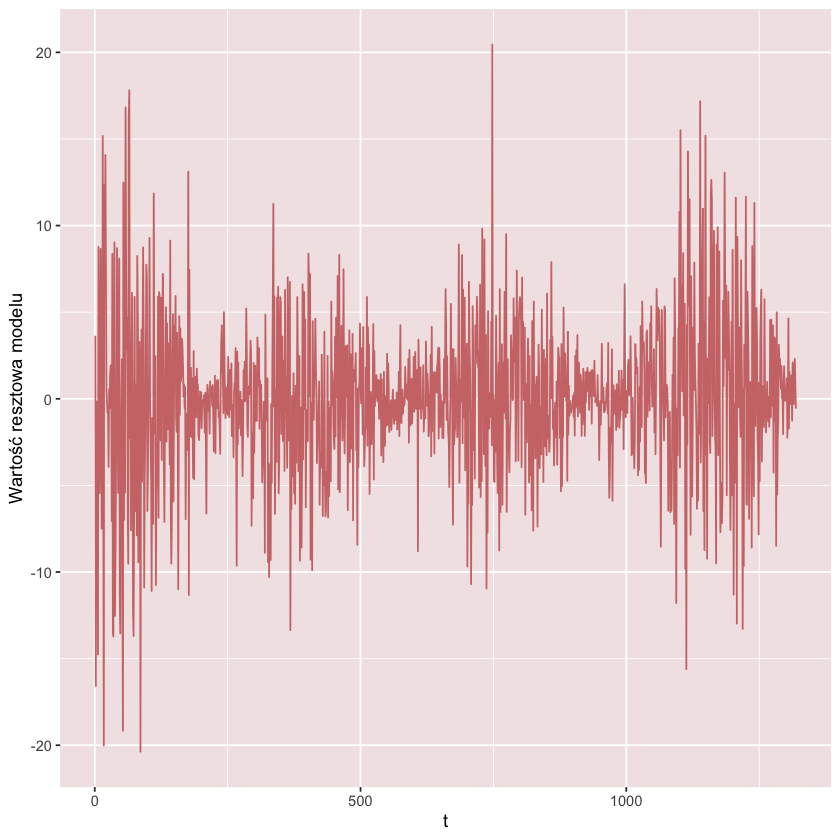

In [153]:
df2$residua <- model$residua

ggplot(df2, aes(x = t, y = residua), color='#CE7777') +
  geom_line(color='#CE7777')+
  labs(x ='t', y = 'Wartość resztowa modelu') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

In [147]:
t.test(df2$residua)


	One Sample t-test

data:  df2$residua
t = 0.065598, df = 1318, p-value = 0.9477
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2328923  0.2490060
sample estimates:
  mean of x 
0.008056867 


In [148]:
install.packages('nortsTest')
library(nortsTest)


Pobrane pakiety binarne są w
	/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T//RtmpxjXumE/downloaded_packages


Registered S3 methods overwritten by 'nortsTest':
  method      from    
  autoplot.ts forecast
  fortify.ts  forecast



In [149]:
arch.test(df2$residua)


	Box-Ljung test

data:  y^2
X-squared = 89.219, df = 2, p-value < 2.2e-16
alternative hypothesis: y is heteroscedastic


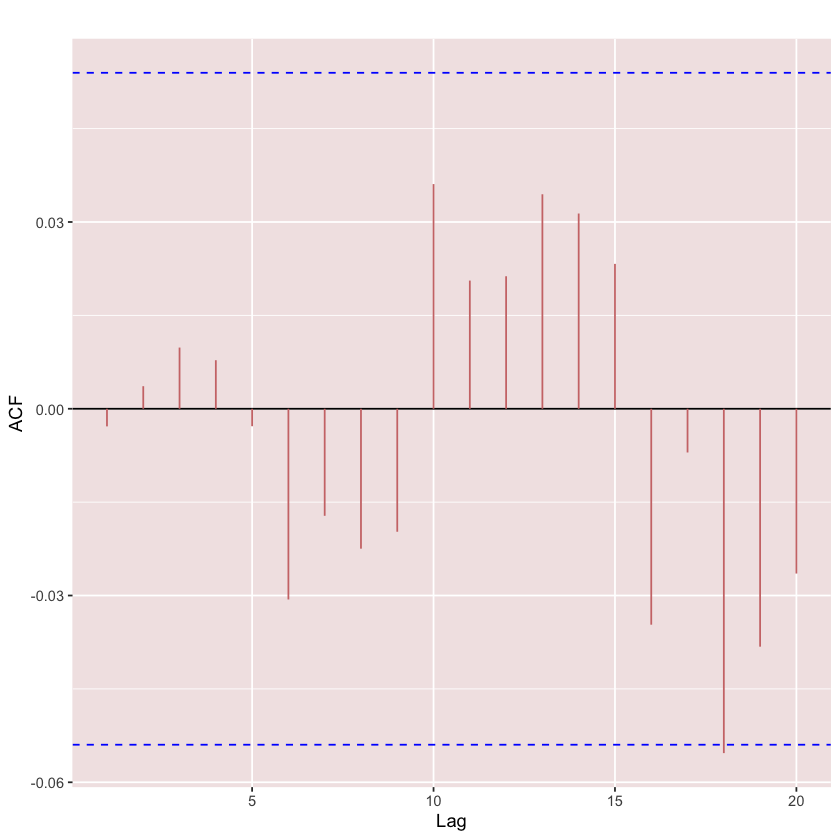

In [150]:
forecast::ggAcf(
  df2$residua,
  lag.max = 20,
  type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#CE7777'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

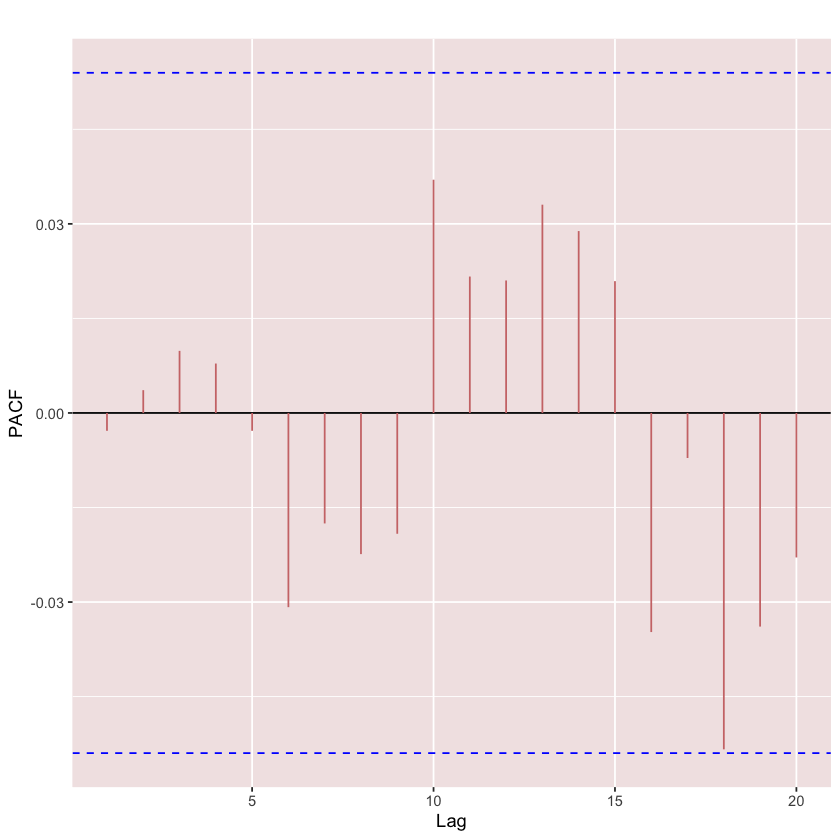

In [151]:
forecast::ggPacf(
  df2$residua,
  lag.max = 20,
  #type = "correlation",
  plot = TRUE,
  na.action = na.contiguous,
  demean = TRUE,
  color = '#CE7777'
) +
  labs(title = ' ') +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


NULL

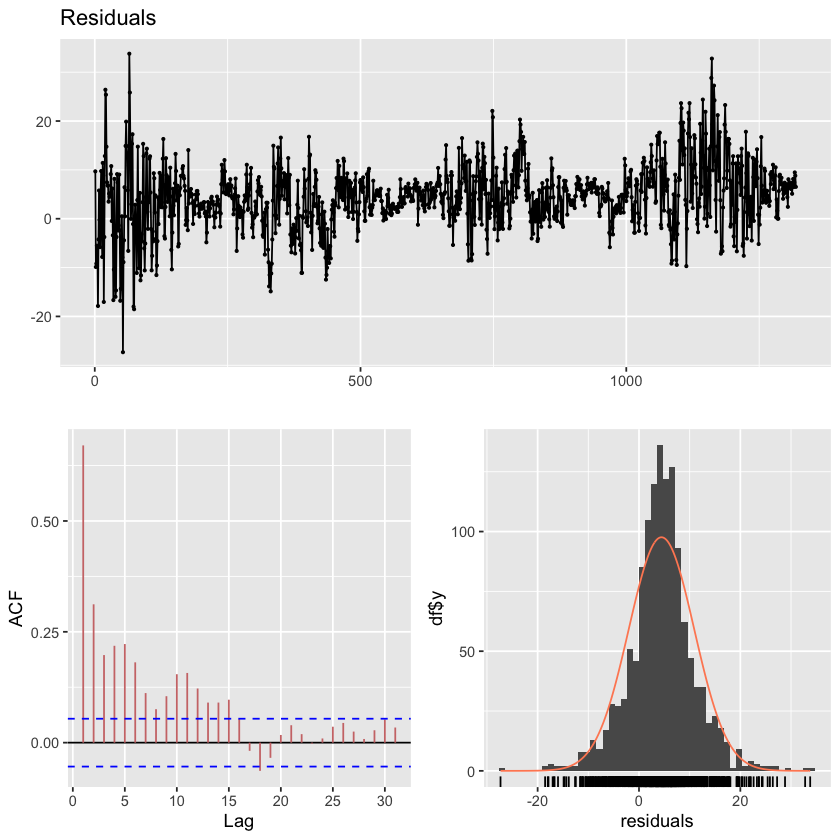

In [ ]:
checkresiduals(df2$bez_okresu, color = '#CE7777') +
theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))


	Ljung-Box test

data:  Residuals from ARIMA(7,0,7) with non-zero mean
Q* = 11.274, df = 3, p-value = 0.01033

Model df: 14.   Total lags used: 17



NULL

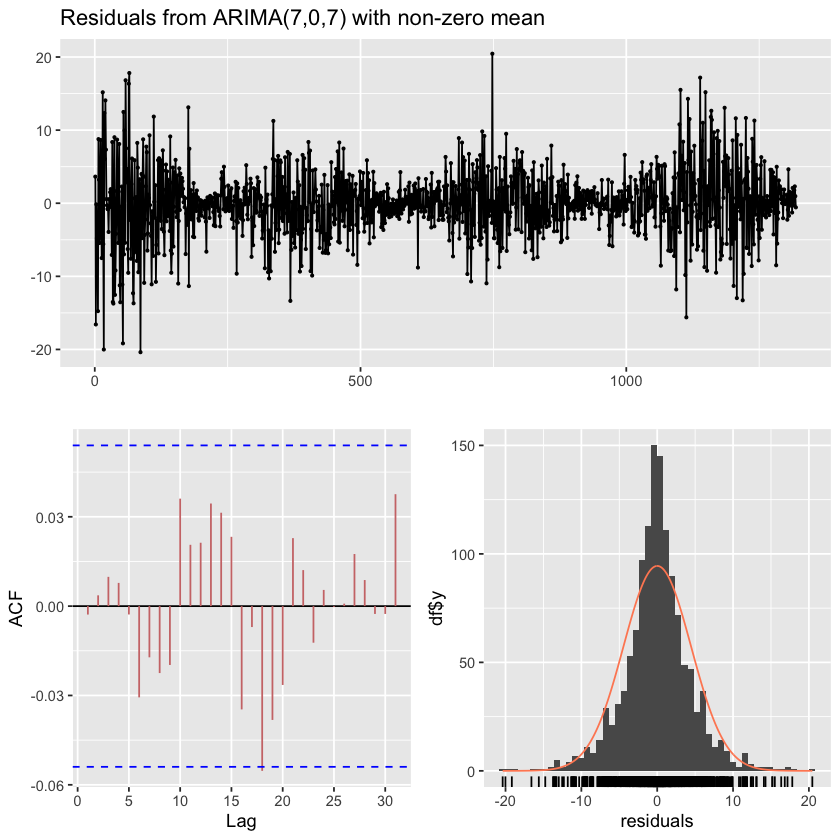

In [ ]:
checkresiduals(model, color = '#CE7777') +
theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5"))


	Shapiro-Wilk normality test

data:  df2$residua
W = 0.96479, p-value < 2.2e-16


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość' w 'mbcsToSbcs': kropka zastąpiona <99>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość' w 'mbcsToSbcs': kropka zastąpiona <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość' w 'mbcsToSbcs': kropka zastąpiona <9b>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość' w 'mbcsToSbcs': kropka zastąpiona <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Częstość

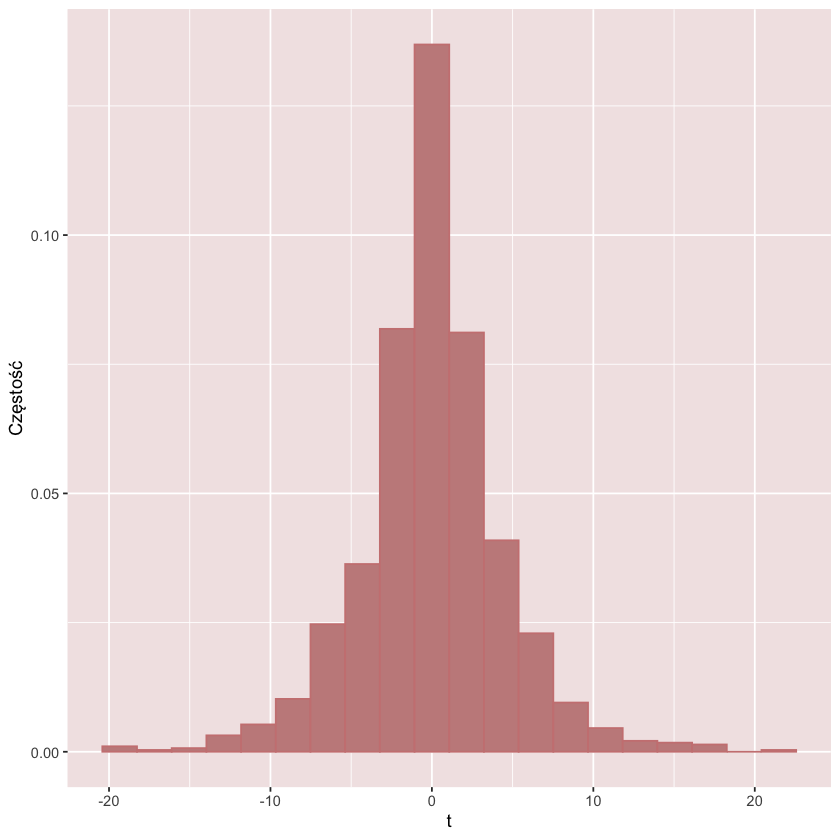

In [158]:
shapiro.test(df2$residua)
ggplot(df2, aes(x=residua)) +
  geom_histogram(aes(y = after_stat(density)), bins = 20, color = '#cc8282', fill = '#c68b8b') +
  #geom_density() +
  theme(panel.background = element_rect(fill = "#F2E5E5", colour = "#F2E5E5")) +
  labs(x ='t', y='Częstość')